# Data Preprocessing & Analysis

### Importing Packages

In [143]:
from os.path import join

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import re
import string
from nltk.corpus import stopwords

import nltk
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump, load

from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

### Importing the Dataset

In [2]:
DATA_DIR = join('..', 'data', 'glue')

#### Train Dataset

In [3]:
train_full_df = pd.read_csv(join(DATA_DIR, 'train.tsv'), sep='\t')
train_full_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,133273,213221,213222,How is the life of a math student? Could you d...,Which level of prepration is enough for the ex...,0
1,402555,536040,536041,How do I control my horny emotions?,How do you control your horniness?,1
2,360472,364011,490273,What causes stool color to change to yellow?,What can cause stool to come out as little balls?,0
3,150662,155721,7256,What can one do after MBBS?,What do i do after my MBBS ?,1
4,183004,279958,279959,Where can I find a power outlet for my laptop ...,"Would a second airport in Sydney, Australia be...",0


In [4]:
def remove_nulls(df):
    print(f"Initial dataframe has {len(df)} rows.")
    null_rows = df[df.isnull().values.any(1)]
    print(f"Dataframe has {len(null_rows)} null rows.")
    df = df.dropna(how='any')
    print(f"Dataframe has {len(df)} rows after removing null values.")
    return df

train_full_df = remove_nulls(train_full_df)

Initial dataframe has 363846 rows.
Dataframe has 0 null rows.
Dataframe has 363846 rows after removing null values.


In [5]:
train_full_df.shape

(363846, 6)

In [6]:
num_samples = len(train_full_df)
num_samples

363846

#### Test Dataset

In [7]:
test_df = pd.read_csv(join(DATA_DIR, 'dev.tsv'), sep='\t')
test_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,201359,303345,303346,Why are African-Americans so beautiful?,Why are hispanics so beautiful?,0
1,263843,69383,380476,I want to pursue PhD in Computer Science about...,I handle social media for a non-profit. Should...,0
2,172974,266948,175089,Is there a reason why we should travel alone?,What are some reasons to travel alone?,1
3,15329,29298,29299,Why are people so obsessed with having a girlf...,How can a single male have a child?,0
4,209794,314169,314170,What are some good baby girl names starting wi...,What are some good baby girl names starting wi...,0


In [8]:
test_df.shape

(40430, 6)

#### Train and Dev Dataset

In [9]:
train_df, dev_df = train_test_split(train_full_df, test_size=0.1, random_state=42)

In [10]:
len(train_df), len(dev_df)

(327461, 36385)

In [11]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
80519,51432,91228,91229,Which topic is the most followed in Quora?,What topic on Quora has the most followers?,1
349125,52249,92541,92542,What does it feel like to have sex with a rela...,Is it possible to eat more than you weigh?,0
126605,135176,215925,215926,Can I get back my best friend?,How do I get back to my best friend as my lover?,0
6008,184003,281230,281231,Are there solar systems that act like a double...,As a Navy SEAL do you feel as if people are af...,0
292788,5971,11714,11715,Why are there only few magnets?,Why is there only few magnets?,1


In [12]:
dev_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
215130,328831,455423,455424,Why do some people think that having a baby is...,Why is having a baby a blessing?,1
234600,41794,75402,75403,How vulnerable are paratroopers on their desce...,Are conventional paratroopers obsolete?,0
118406,184181,56834,281459,Examples of sole proprietorship? The,How are sole proprietorships started?,0
284746,61939,50127,69389,Why don't I get answers for some of my questio...,Why do some questions get more answers here in...,1
300683,352765,481723,13812,Do Kashmiris wants to join Pakistan?,Do the people of Kashmir want to join Pakistan...,0


### Splitting into X and y

In [13]:
X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:, -1]

In [14]:
X_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]

In [15]:
X_dev = dev_df.iloc[:,:-1]
y_dev = dev_df.iloc[:,-1]

### WordCloud

(-0.5, 359.5, 269.5, -0.5)

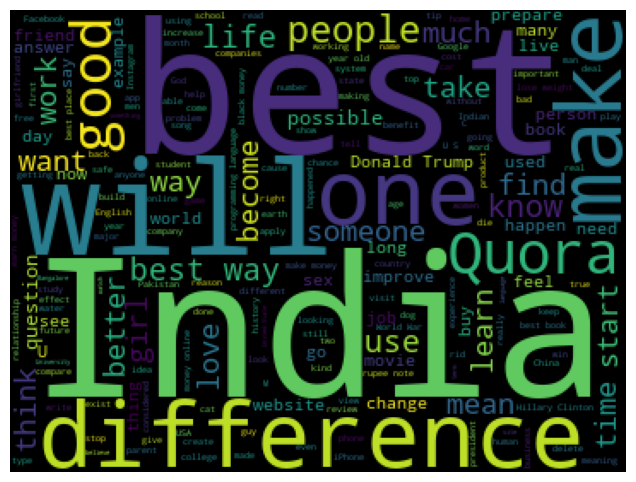

In [16]:
all_questions_concat = train_df['question1'].str.cat(sep=' ') + train_df['question2'].str.cat(sep=' ')

cloud = WordCloud(width=360, height=270).generate(all_questions_concat)
plt.figure(figsize=(10, 6))
plt.imshow(cloud)
plt.axis('off')

### Checking for Class Imbalance

In [17]:
pos_class_count = len(train_df[train_df['is_duplicate'] == 1])
neg_class_count = num_samples - pos_class_count

pos_percentage = (pos_class_count / num_samples) * 100
neg_percentage = (neg_class_count / num_samples) * 100

print(f'Number of question pairs classified as duplicate: {pos_class_count}, ({pos_percentage:.2f}%)')
print(f'Number of question pairs classified as not duplicate: {neg_class_count}, ({neg_percentage:.2f}%)')

Number of question pairs classified as duplicate: 121060, (33.27%)
Number of question pairs classified as not duplicate: 242786, (66.73%)


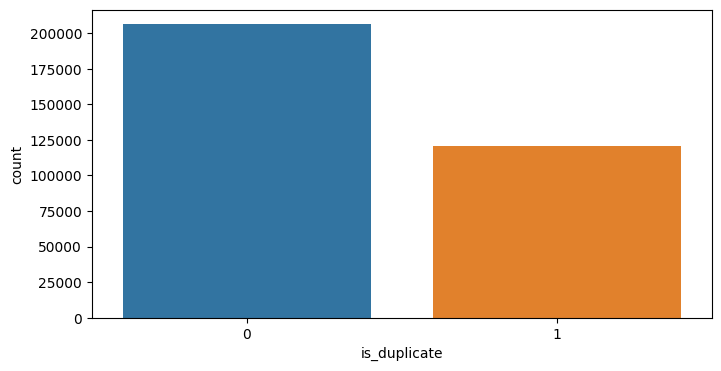

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(x='is_duplicate', data=train_df)
plt.xlabel('is_duplicate')
plt.ylabel('count')

plt.show()

### Checking for Duplicate Questions

In [19]:
question_ids = train_df['qid1'].to_list() + train_df['qid2'].to_list()
print(f"Total number of questions: {len(question_ids)}")

question_ids = pd.DataFrame(question_ids, columns=["qid"])
print(f"Unique questions: {len(question_ids['qid'].unique())}")

Total number of questions: 654922
Unique questions: 454160


In [20]:
question_counts = question_ids.value_counts()
question_counts

qid   
2559      133
4044       93
30782      93
2561       74
17978      59
         ... 
214911      1
214910      1
214909      1
214908      1
537933      1
Length: 454160, dtype: int64

In [22]:
# look at an example of a duplicate question
dup = train_df[(train_df['qid1'] == 2559) | (train_df['qid2'] == 2559)]
dup.head(2)

,id,qid1,qid2,question1,question2,is_duplicate
357297,391318,127608,2559,What are the best laxatives to lose weight?,What are the best ways to lose weight?,0
342073,150557,236943,2559,What should be my diet plan for fat loss witho...,What are the best ways to lose weight?,0


In [23]:
# questions that appear more than once
dup_questions = question_counts[question_counts > 1]
dup_questions

qid   
2559      133
4044       93
30782      93
2561       74
17978      59
         ... 
273255      2
9567        2
187064      2
332388      2
49421       2
Length: 87200, dtype: int64

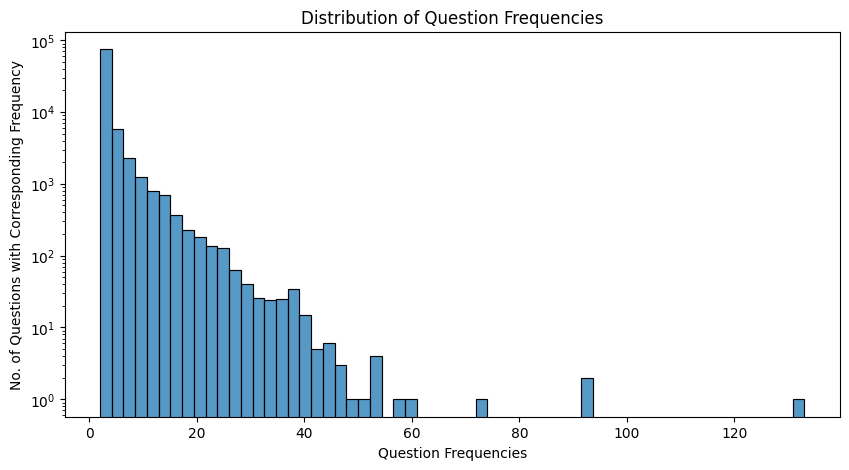

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(data=dup_questions, bins=60)
plt.xlabel('Question Frequencies')
plt.ylabel('No. of Questions with Corresponding Frequency')
plt.yscale('log')
plt.title('Distribution of Question Frequencies')
plt.show()

### Checking for Duplicate Rows

In [25]:
pair_counts = train_df[['qid1', 'qid2']].groupby(['qid1', 'qid2']).count().reset_index()
has_duplicate_pairs = not (len(pair_counts) == num_samples)
print(f'There are {"" if has_duplicate_pairs else "no "}duplicate pairs.')

There are duplicate pairs.


### Data Preprocessing and Cleaning

In [ ]:
!python -m nltk.downloader stopwords

In [31]:
def clean_text(text, remove_stopwords=False):
  text = text.lower() # lower case
  text = re.sub('\s+\n+', ' ', text)
  text = re.sub(f"[{re.escape(string.punctuation)}]", ' ', text) # remove punctuation
  text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text) # remove special chars

  if remove_stopwords:
    sw = set(stopwords.words("english"))
    text = ' '.join([word for word in text.split() if word not in sw])

  return text

demo_qn = "What's the meaning of life? #@"
clean_text(demo_qn), clean_text(demo_qn, remove_stopwords=True)

('what s the meaning of life    ', 'meaning life')

In [33]:
X_train['cleaned_question1'] = X_train['question1'].apply(clean_text)
X_train['cleaned_question2'] = X_train['question2'].apply(clean_text)
X_train.head()

,id,qid1,qid2,question1,question2,cleaned_question1,cleaned_question2
80519,51432,91228,91229,Which topic is the most followed in Quora?,What topic on Quora has the most followers?,which topic is the most followed in quora,what topic on quora has the most followers
349125,52249,92541,92542,What does it feel like to have sex with a rela...,Is it possible to eat more than you weigh?,what does it feel like to have sex with a rela...,is it possible to eat more than you weigh
126605,135176,215925,215926,Can I get back my best friend?,How do I get back to my best friend as my lover?,can i get back my best friend,how do i get back to my best friend as my lover
6008,184003,281230,281231,Are there solar systems that act like a double...,As a Navy SEAL do you feel as if people are af...,are there solar systems that act like a double...,as a navy seal do you feel as if people are af...
292788,5971,11714,11715,Why are there only few magnets?,Why is there only few magnets?,why are there only few magnets,why is there only few magnets


### Word Count Analysis

I think this might help in determining the neural network architecture to use? The max question length is around 200 which might not work well if we are using RNNs, i.e. RNNs generally work well for shorter sequences.

In [34]:
# find word counts of questions
X_train['question1_word_count'] = X_train['cleaned_question1'].apply(lambda x: len(str(x).split()))
X_train['question2_word_count'] = X_train['cleaned_question2'].apply(lambda x: len(str(x).split()))
X_train.head()

,id,qid1,qid2,question1,question2,cleaned_question1,cleaned_question2,question1_word_count,question2_word_count
80519,51432,91228,91229,Which topic is the most followed in Quora?,What topic on Quora has the most followers?,which topic is the most followed in quora,what topic on quora has the most followers,8,8
349125,52249,92541,92542,What does it feel like to have sex with a rela...,Is it possible to eat more than you weigh?,what does it feel like to have sex with a rela...,is it possible to eat more than you weigh,13,9
126605,135176,215925,215926,Can I get back my best friend?,How do I get back to my best friend as my lover?,can i get back my best friend,how do i get back to my best friend as my lover,7,12
6008,184003,281230,281231,Are there solar systems that act like a double...,As a Navy SEAL do you feel as if people are af...,are there solar systems that act like a double...,as a navy seal do you feel as if people are af...,10,20
292788,5971,11714,11715,Why are there only few magnets?,Why is there only few magnets?,why are there only few magnets,why is there only few magnets,6,6


Min word count for question 1: 0
Min word count for question 2: 0
Max word count for question 1: 128
Max word count for question 2: 248


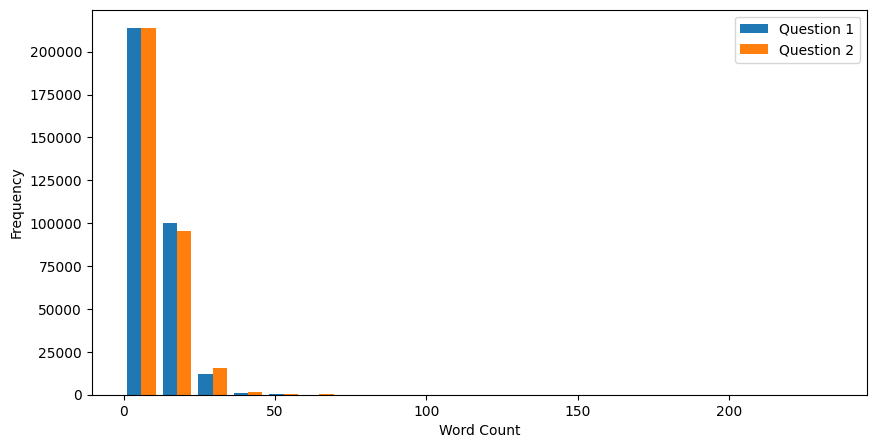

In [35]:
print(f"Min word count for question 1: {X_train['question1_word_count'].min()}")
print(f"Min word count for question 2: {X_train['question2_word_count'].min()}")

print(f"Max word count for question 1: {X_train['question1_word_count'].max()}")
print(f"Max word count for question 2: {X_train['question2_word_count'].max()}")

plt.figure(figsize=(10, 5))
plt.hist([X_train['question1_word_count'], X_train['question2_word_count']], bins=20, label=['Question 1', 'Question 2'], range=(0, 235))
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()

In [36]:
X_train['question1_word_count'].describe()

count    327461.000000
mean         11.124885
std           5.575543
min           0.000000
25%           7.000000
50%          10.000000
75%          13.000000
max         128.000000
Name: question1_word_count, dtype: float64

In [37]:
X_train['question2_word_count'].describe()

count    327461.000000
mean         11.372866
std           6.459405
min           0.000000
25%           7.000000
50%          10.000000
75%          13.000000
max         248.000000
Name: question2_word_count, dtype: float64

In [38]:
X_train[(X_train['question1_word_count'] == 0) | (X_train['question2_word_count'] == 0)].head(2)

,id,qid1,qid2,question1,question2,cleaned_question1,cleaned_question2,question1_word_count,question2_word_count
220206,144343,228468,228469,What is the psychological explanation to the e...,ماذا علي ان افعل لكي اشعر بالسعادة و الرضى ؟,what is the psychological explanation to the e...,,16,0
117965,96725,161071,161072,?,"Who are Moses, Noah and Exodus?",,who are moses noah and exodus,0,6


In [39]:
word_count_bins = 20
hist, bin_edges = np.histogram(X_train['question1_word_count'], bins=word_count_bins)

bin_with_highest_freq = bin_edges[np.argmax(hist)]
bin_with_lowest_freq = bin_edges[np.argmin(hist)]
print(f"Word count with the highest frequency: {bin_with_highest_freq:1f}")
print(f"Word count with the lowest frequency: {bin_with_lowest_freq:1f}")

Word count with the highest frequency: 6.400000
Word count with the lowest frequency: 83.200000


### Word Frequency Analysis

Determine how many tokens we need. The data here is not cleaned yet so we might need much less tokens.

In [40]:
word_frequency = X_train['cleaned_question1'].str.cat(sep=' ').split() + X_train['cleaned_question2'].str.cat(sep=' ').split()
word_freq_dict = pd.Series(word_frequency).value_counts()

In [41]:
num_words = len(word_freq_dict)
print(f"Number of unique words/tokens: {num_words}")

Number of unique words/tokens: 77812


In [42]:
word_freq_dict.head(10)  # 10 most common words

the     305946
what    263244
is      218498
i       180807
how     178807
a       171876
to      166863
in      159798
do      130286
of      129449
dtype: int64

In [43]:
word_freq_dict.tail(10) # least common words

unbeatable    1
murrieta      1
reachex       1
malena        1
belluci       1
dyrdek        1
cep           1
collge        1
breeza        1
roading       1
dtype: int64

### Matching Words in Both Questions

In [ ]:
!python -m nltk.downloader punkt

In [46]:
def calculate_common_word_proportion(question1, question2):
  tokens1 = list(set(word_tokenize(question1)))
  tokens2 = list(set(word_tokenize(question2)))

  # intersection of the token sets
  common_tokens = np.intersect1d(tokens1, tokens2)
  total_tokens = np.union1d(tokens1, tokens2)

  # proportion of common words (Jaccard similarity)
  proportion = (len(common_tokens) / len(total_tokens)) if not len(total_tokens) == 0 else 0

  return proportion

#### With Stopwords

In [47]:
X_train['common_word_proportion'] = X_train.apply(lambda row: calculate_common_word_proportion(row['cleaned_question1'], row['cleaned_question2']), axis=1)
X_train.head()

,id,qid1,qid2,question1,question2,cleaned_question1,cleaned_question2,question1_word_count,question2_word_count,common_word_proportion
80519,51432,91228,91229,Which topic is the most followed in Quora?,What topic on Quora has the most followers?,which topic is the most followed in quora,what topic on quora has the most followers,8,8,0.333333
349125,52249,92541,92542,What does it feel like to have sex with a rela...,Is it possible to eat more than you weigh?,what does it feel like to have sex with a rela...,is it possible to eat more than you weigh,13,9,0.100000
126605,135176,215925,215926,Can I get back my best friend?,How do I get back to my best friend as my lover?,can i get back my best friend,how do i get back to my best friend as my lover,7,12,0.500000
6008,184003,281230,281231,Are there solar systems that act like a double...,As a Navy SEAL do you feel as if people are af...,are there solar systems that act like a double...,as a navy seal do you feel as if people are af...,10,20,0.086957
292788,5971,11714,11715,Why are there only few magnets?,Why is there only few magnets?,why are there only few magnets,why is there only few magnets,6,6,0.714286


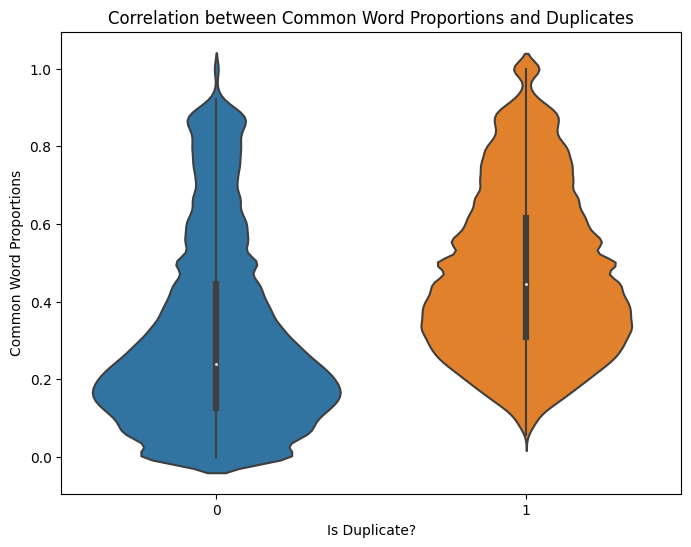

In [48]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=y_train, y='common_word_proportion', data=X_train)
plt.xlabel('Is Duplicate?')
plt.ylabel('Common Word Proportions')
plt.title('Correlation between Common Word Proportions and Duplicates')
plt.show()

There is not much of a correlation between the word proportions and whether the question pair is a duplicate or not. This could be due to the presence of stopwords.

In [49]:
correlation_coefficient = X_train['common_word_proportion'].corr(y_train)
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.32972065285852686


#### Excluding Stopwords

In [50]:
X_train['no_stops_question1'] = X_train['question1'].apply(lambda x: clean_text(x, remove_stopwords=True))
X_train['no_stops_question2'] = X_train['question2'].apply(lambda x: clean_text(x, remove_stopwords=True))

In [51]:
X_train.head()

,id,qid1,qid2,question1,question2,cleaned_question1,cleaned_question2,question1_word_count,question2_word_count,common_word_proportion,no_stops_question1,no_stops_question2
80519,51432,91228,91229,Which topic is the most followed in Quora?,What topic on Quora has the most followers?,which topic is the most followed in quora,what topic on quora has the most followers,8,8,0.333333,topic followed quora,topic quora followers
349125,52249,92541,92542,What does it feel like to have sex with a rela...,Is it possible to eat more than you weigh?,what does it feel like to have sex with a rela...,is it possible to eat more than you weigh,13,9,0.100000,feel like sex relatively chubby female,possible eat weigh
126605,135176,215925,215926,Can I get back my best friend?,How do I get back to my best friend as my lover?,can i get back my best friend,how do i get back to my best friend as my lover,7,12,0.500000,get back best friend,get back best friend lover
6008,184003,281230,281231,Are there solar systems that act like a double...,As a Navy SEAL do you feel as if people are af...,are there solar systems that act like a double...,as a navy seal do you feel as if people are af...,10,20,0.086957,solar systems act like double pendulum,navy seal feel people afraid know seal
292788,5971,11714,11715,Why are there only few magnets?,Why is there only few magnets?,why are there only few magnets,why is there only few magnets,6,6,0.714286,magnets,magnets


In [52]:
X_train['common_word_proportion_no_stops'] = X_train.apply(lambda row: calculate_common_word_proportion(row['no_stops_question1'], row['no_stops_question2']), axis=1)
X_train.head()

,id,qid1,qid2,question1,question2,cleaned_question1,cleaned_question2,question1_word_count,question2_word_count,common_word_proportion,no_stops_question1,no_stops_question2,common_word_proportion_no_stops
80519,51432,91228,91229,Which topic is the most followed in Quora?,What topic on Quora has the most followers?,which topic is the most followed in quora,what topic on quora has the most followers,8,8,0.333333,topic followed quora,topic quora followers,0.5
349125,52249,92541,92542,What does it feel like to have sex with a rela...,Is it possible to eat more than you weigh?,what does it feel like to have sex with a rela...,is it possible to eat more than you weigh,13,9,0.100000,feel like sex relatively chubby female,possible eat weigh,0.0
126605,135176,215925,215926,Can I get back my best friend?,How do I get back to my best friend as my lover?,can i get back my best friend,how do i get back to my best friend as my lover,7,12,0.500000,get back best friend,get back best friend lover,0.8
6008,184003,281230,281231,Are there solar systems that act like a double...,As a Navy SEAL do you feel as if people are af...,are there solar systems that act like a double...,as a navy seal do you feel as if people are af...,10,20,0.086957,solar systems act like double pendulum,navy seal feel people afraid know seal,0.0
292788,5971,11714,11715,Why are there only few magnets?,Why is there only few magnets?,why are there only few magnets,why is there only few magnets,6,6,0.714286,magnets,magnets,1.0


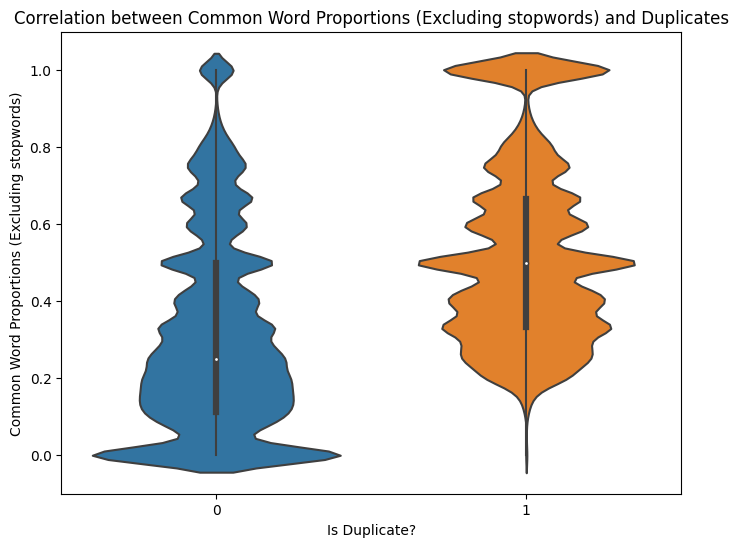

In [53]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=y_train, y='common_word_proportion_no_stops', data=X_train)
plt.xlabel('Is Duplicate?')
plt.ylabel('Common Word Proportions (Excluding stopwords)')
plt.title('Correlation between Common Word Proportions (Excluding stopwords) and Duplicates')
plt.show()

It can be observed from the plot above that there is a small correlation between the proportion of common words (excluding stopwords) and whether the question pair is a duplicate or not.

If the proportion of common words is low (close to zero), them there is a high probability that it is not a duplicate.

In this example, we treat all words equally. We can use TF-IDF to weigh each word so that if an uncommon word appears in both questions, it can be mean there is a higher chance of the questions being duplicates.

In [54]:
correlation_coefficient = X_train['common_word_proportion_no_stops'].corr(y_train)
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.392073875780004


#### TF-IDF Similarity

In [56]:
vectorizer = TfidfVectorizer()

q1 = X_train['no_stops_question1']
q2 = X_train['no_stops_question2']

# fit questions
q1_concat_q2 = pd.concat([q1, q2])
tfidf_vectorizer = vectorizer.fit(q1_concat_q2)
tfidf_matrix = tfidf_vectorizer.transform(q1_concat_q2)

dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [57]:
q1_concat_q2[:len(X_train)], q1_concat_q2[len(X_train):]

(80519                                  topic followed quora
 349125               feel like sex relatively chubby female
 126605                                 get back best friend
 6008                 solar systems act like double pendulum
 292788                                              magnets
                                 ...                        
 119879    created character bunch people made fake wikip...
 259178    today 15 ton crane used 10 15 minutes motor go...
 131932                          herpes outbreak one blister
 146867                                                 nato
 121958                                  actual meaning life
 Length: 327461, dtype: object,
 80519                                 topic quora followers
 349125                                   possible eat weigh
 126605                           get back best friend lover
 6008                 navy seal feel people afraid know seal
 292788                                              

In [58]:
tfidf_matrix.shape

(654922, 77634)

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

def tfidf_word_share(doc1_idx, doc2_idx, tfidf_matrix):
  tfidf_doc1 = tfidf_matrix[doc1_idx]
  tfidf_doc2 = tfidf_matrix[doc2_idx]
  cosine_sim = cosine_similarity(tfidf_doc1, tfidf_doc2)
  similarity_score = cosine_sim[0][0]
  return similarity_score

In [60]:
X_train['tfidf_similarity'] = [tfidf_word_share(i, i + len(X_train), tfidf_matrix) for i in range(len(X_train))]

In [61]:
X_train.head()

,id,qid1,qid2,question1,question2,cleaned_question1,cleaned_question2,question1_word_count,question2_word_count,common_word_proportion,no_stops_question1,no_stops_question2,common_word_proportion_no_stops,tfidf_similarity
80519,51432,91228,91229,Which topic is the most followed in Quora?,What topic on Quora has the most followers?,which topic is the most followed in quora,what topic on quora has the most followers,8,8,0.333333,topic followed quora,topic quora followers,0.5,0.564432
349125,52249,92541,92542,What does it feel like to have sex with a rela...,Is it possible to eat more than you weigh?,what does it feel like to have sex with a rela...,is it possible to eat more than you weigh,13,9,0.100000,feel like sex relatively chubby female,possible eat weigh,0.0,0.000000
126605,135176,215925,215926,Can I get back my best friend?,How do I get back to my best friend as my lover?,can i get back my best friend,how do i get back to my best friend as my lover,7,12,0.500000,get back best friend,get back best friend lover,0.8,0.730278
6008,184003,281230,281231,Are there solar systems that act like a double...,As a Navy SEAL do you feel as if people are af...,are there solar systems that act like a double...,as a navy seal do you feel as if people are af...,10,20,0.086957,solar systems act like double pendulum,navy seal feel people afraid know seal,0.0,0.000000
292788,5971,11714,11715,Why are there only few magnets?,Why is there only few magnets?,why are there only few magnets,why is there only few magnets,6,6,0.714286,magnets,magnets,1.0,1.000000


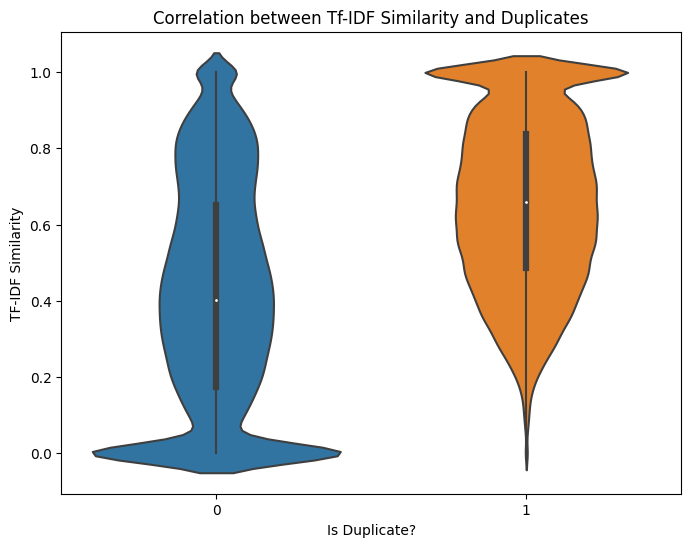

In [70]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=y_train, y='tfidf_similarity', data=X_train)
plt.xlabel('Is Duplicate?')
plt.ylabel('TF-IDF Similarity')
plt.title('Correlation between Tf-IDF Similarity and Duplicates')
plt.show()

In [71]:
correlation_coefficient = X_train['tfidf_similarity'].corr(y_train)
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.39573865489421195


### Difference in Question Character Count

In [72]:
X_train['char_count_diff'] = abs(X_train['question1'].str.len() - X_train['question2'].str.len())
X_train.head()

,id,qid1,qid2,question1,question2,cleaned_question1,cleaned_question2,question1_word_count,question2_word_count,common_word_proportion,no_stops_question1,no_stops_question2,common_word_proportion_no_stops,tfidf_similarity,char_count_diff,question_length_diff
80519,51432,91228,91229,Which topic is the most followed in Quora?,What topic on Quora has the most followers?,which topic is the most followed in quora,what topic on quora has the most followers,8,8,0.333333,topic followed quora,topic quora followers,0.5,0.564432,1,0
349125,52249,92541,92542,What does it feel like to have sex with a rela...,Is it possible to eat more than you weigh?,what does it feel like to have sex with a rela...,is it possible to eat more than you weigh,13,9,0.100000,feel like sex relatively chubby female,possible eat weigh,0.0,0.000000,25,4
126605,135176,215925,215926,Can I get back my best friend?,How do I get back to my best friend as my lover?,can i get back my best friend,how do i get back to my best friend as my lover,7,12,0.500000,get back best friend,get back best friend lover,0.8,0.730278,18,5
6008,184003,281230,281231,Are there solar systems that act like a double...,As a Navy SEAL do you feel as if people are af...,are there solar systems that act like a double...,as a navy seal do you feel as if people are af...,10,20,0.086957,solar systems act like double pendulum,navy seal feel people afraid know seal,0.0,0.000000,28,10
292788,5971,11714,11715,Why are there only few magnets?,Why is there only few magnets?,why are there only few magnets,why is there only few magnets,6,6,0.714286,magnets,magnets,1.0,1.000000,1,0


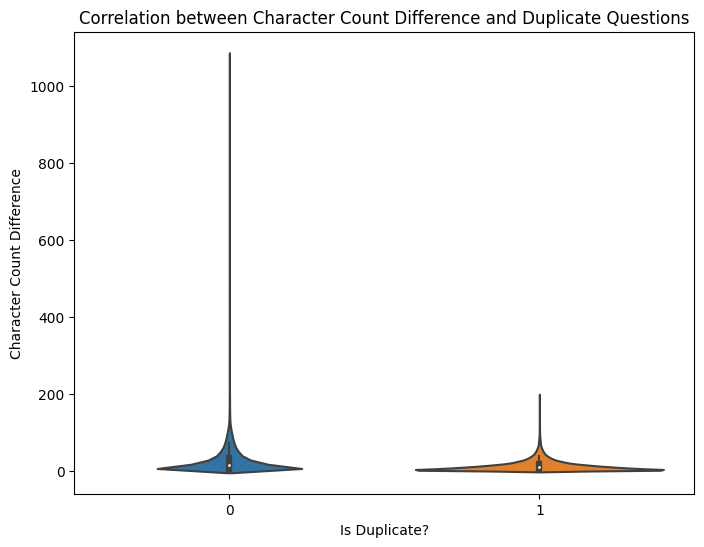

In [73]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=y_train, y='char_count_diff', data=X_train)
plt.xlabel('Is Duplicate?')
plt.ylabel('Character Count Difference')
plt.title('Correlation between Character Count Difference and Duplicate Questions')
plt.show()

In [74]:
correlation_coefficient = X_train['char_count_diff'].corr(y_train)
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: -0.21050559749472827


### Difference in Question Length

Check if there is a correlation between question having the same lengths and the question pair being a duplicate

There doesn't seem to be a correlation, so the `question_length_diff` feature may not be too useful.

In [75]:
X_train['question_length_diff'] = abs(X_train['question1_word_count'] - X_train['question2_word_count'])
X_train.head()

,id,qid1,qid2,question1,question2,cleaned_question1,cleaned_question2,question1_word_count,question2_word_count,common_word_proportion,no_stops_question1,no_stops_question2,common_word_proportion_no_stops,tfidf_similarity,char_count_diff,question_length_diff
80519,51432,91228,91229,Which topic is the most followed in Quora?,What topic on Quora has the most followers?,which topic is the most followed in quora,what topic on quora has the most followers,8,8,0.333333,topic followed quora,topic quora followers,0.5,0.564432,1,0
349125,52249,92541,92542,What does it feel like to have sex with a rela...,Is it possible to eat more than you weigh?,what does it feel like to have sex with a rela...,is it possible to eat more than you weigh,13,9,0.100000,feel like sex relatively chubby female,possible eat weigh,0.0,0.000000,25,4
126605,135176,215925,215926,Can I get back my best friend?,How do I get back to my best friend as my lover?,can i get back my best friend,how do i get back to my best friend as my lover,7,12,0.500000,get back best friend,get back best friend lover,0.8,0.730278,18,5
6008,184003,281230,281231,Are there solar systems that act like a double...,As a Navy SEAL do you feel as if people are af...,are there solar systems that act like a double...,as a navy seal do you feel as if people are af...,10,20,0.086957,solar systems act like double pendulum,navy seal feel people afraid know seal,0.0,0.000000,28,10
292788,5971,11714,11715,Why are there only few magnets?,Why is there only few magnets?,why are there only few magnets,why is there only few magnets,6,6,0.714286,magnets,magnets,1.0,1.000000,1,0


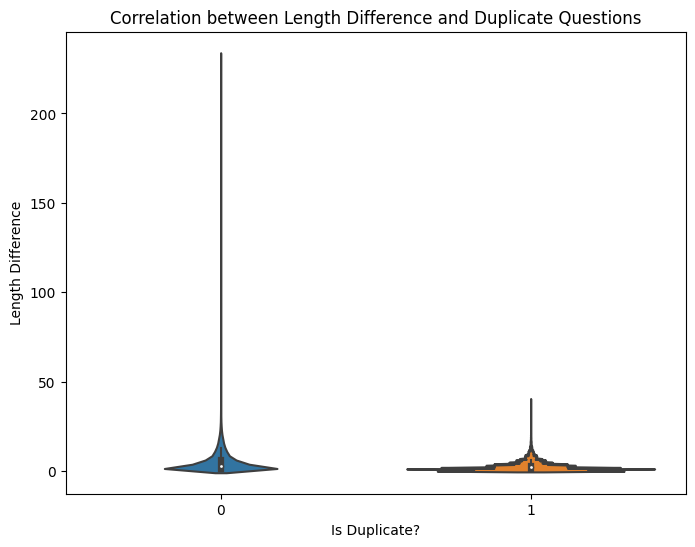

In [76]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=y_train, y='question_length_diff', data=X_train)
plt.xlabel('Is Duplicate?')
plt.ylabel('Length Difference')
plt.title('Correlation between Length Difference and Duplicate Questions')
plt.show()

There is not much correlation, this feature might not be too important.

In [77]:
correlation_coefficient = X_train['question_length_diff'].corr(y_train)
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: -0.20428712229023652


### Word Embeddings (`Word2Vec`)

In [56]:
!python -m nltk.downloader punkt

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [57]:
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize

questions = []

q1_concat_q2 = pd.concat([X_train['cleaned_question1'], X_train['cleaned_question2']])
q1_concat_q2.head()

107500                             what is colour of water 
300891    what would a bedroom in the year 1980 look lik...
292925                                does prosecco go off 
271797    should i opt for chemical engineering if i am ...
230516                      can i eat eggs and banana only 
dtype: object

In [58]:
for q in q1_concat_q2:
  words = word_tokenize(q)

  questions.append(words)

In [59]:
model = Word2Vec(questions, vector_size=10, window=3, min_count=1, sg=1)

In [60]:
model.save('/content/drive/MyDrive/ay2324 sem1/cs3244/project/word2_vec_simple_classifier.model')

In [61]:
def calculate_embeddings_similarity(df, model):
  similarities = []

  for _, row in df.iterrows():
    q1 = row['cleaned_question1']
    q2 = row['cleaned_question2']

    # Tokenize and preprocess the questions as needed
    words_1 = word_tokenize(q1)
    words_2 = word_tokenize(q2)

    # Filter out words that are not present in the Word2Vec model
    words_1 = [word for word in words_1 if word in model.wv]
    words_2 = [word for word in words_2 if word in model.wv]

    # Calculate the average Word2Vec embeddings for each question
    if words_1 and words_2:
      embedding_1 = np.mean([model.wv[word] for word in words_1], axis=0)
      embedding_2 = np.mean([model.wv[word] for word in words_2], axis=0)
      similarity = cosine_similarity([embedding_1], [embedding_2])[0][0]
    else:
      similarity = 0.0

    similarities.append(similarity)

  return pd.Series(similarities)

In [62]:
X_train['embeddings_similarity'] = calculate_embeddings_similarity(X_train, model)

In [63]:
X_train.head()

,id,qid1,qid2,question1,question2,cleaned_question1,cleaned_question2,question1_word_count,question2_word_count,common_word_proportion,no_stops_question1,no_stops_question2,common_word_proportion_no_stops,tfidf_similarity,char_count_diff,question_length_diff,embeddings_similarity
107500,107500,176853,176854,What is colour of water?,What is the colour of water?,what is colour of water,what is the colour of water,5,6,0.833333,colour water,colour water,1.000000,1.000000,4,1,0.999637
300891,300891,111985,70822,What would a bedroom in the year 1980 look lik...,What would an older man's bedroom look like in...,what would a bedroom in the year 1980 look lik...,what would an older man s bedroom look like in...,21,13,0.650000,would bedroom year 1980 look like would older ...,would older man bedroom look like year 1980,0.888889,0.910786,32,8,NaN
292925,292925,414609,414610,Does prosecco go off?,Does unopened champagne go bad?,does prosecco go off,does unopened champagne go bad,4,5,0.285714,prosecco go,unopened champagne go bad,0.200000,0.123890,10,1,NaN
271797,271797,389950,196146,Should I opt for Chemical Engineering if I am ...,Should I study chemical engineering because I ...,should i opt for chemical engineering if i am ...,should i study chemical engineering because i ...,13,13,0.333333,opt chemical engineering super interested chem...,study chemical engineering like good chemistry,0.333333,0.526283,2,0,0.993423
230516,230516,260341,340072,Can I eat eggs and banana only?,Is it dangerous to eat bananas and eggs together?,can i eat eggs and banana only,is it dangerous to eat bananas and eggs together,7,9,0.230769,eat eggs banana,dangerous eat bananas eggs together,0.333333,0.435171,18,2,0.923169


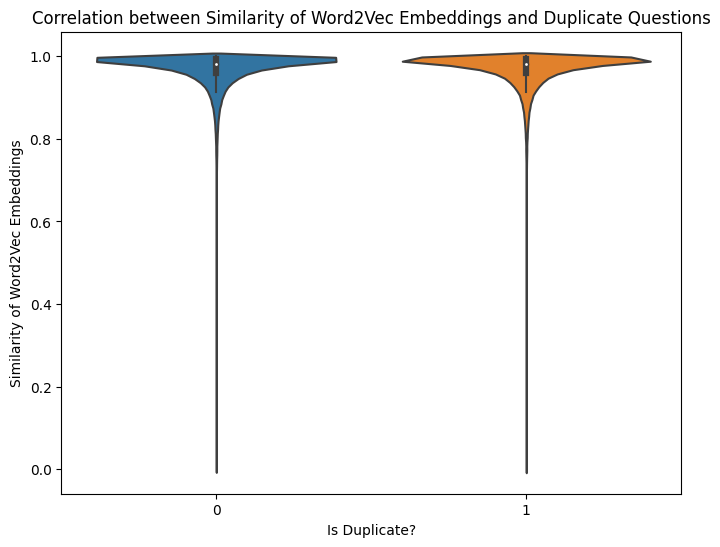

In [64]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=y_train, y='embeddings_similarity', data=X_train)
plt.xlabel('Is Duplicate?')
plt.ylabel('Similarity of Word2Vec Embeddings')
plt.title('Correlation between Similarity of Word2Vec Embeddings and Duplicate Questions')
plt.show()

In [65]:
correlation_coefficient = X_train['embeddings_similarity'].corr(y_train)
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.0005142747896340351


### Extracting Numerical Features

In [78]:
X_train_filtered = X_train[['question1_word_count', 'question2_word_count', 'common_word_proportion', 'common_word_proportion_no_stops', 'tfidf_similarity', 'char_count_diff', 'question_length_diff']]
X_train_filtered.head()

,question1_word_count,question2_word_count,common_word_proportion,common_word_proportion_no_stops,tfidf_similarity,char_count_diff,question_length_diff
80519,8,8,0.333333,0.5,0.564432,1,0
349125,13,9,0.100000,0.0,0.000000,25,4
126605,7,12,0.500000,0.8,0.730278,18,5
6008,10,20,0.086957,0.0,0.000000,28,10
292788,6,6,0.714286,1.0,1.000000,1,0


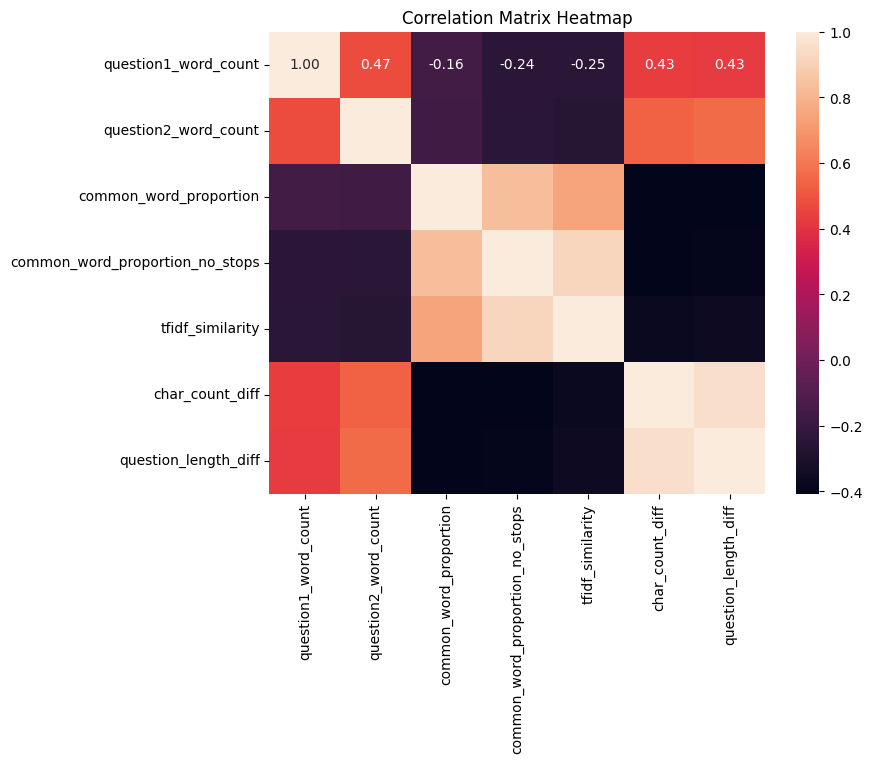

In [147]:
correlation_matrix = X_train_filtered.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Training Simple Classifiers

In [80]:
from joblib import load
tfidf_vectorizer = load('tfidf_vectorizer.joblib')

def transform_question_pairs(val_test):
    df = val_test.copy()

    df = remove_nulls(df)

    df['cleaned_question1'] = df['question1'].apply(clean_text)
    df['cleaned_question2'] = df['question2'].apply(clean_text)

    df['question1_word_count'] = df['cleaned_question1'].apply(lambda x: len(str(x).split()))
    df['question2_word_count'] = df['cleaned_question2'].apply(lambda x: len(str(x).split()))

    df['common_word_proportion'] = df.apply(lambda row: calculate_common_word_proportion(row['cleaned_question1'], row['cleaned_question2']), axis=1)

    df['no_stops_question1'] = df['question1'].apply(lambda x: clean_text(x, remove_stopwords=True))
    df['no_stops_question2'] = df['question2'].apply(lambda x: clean_text(x, remove_stopwords=True))

    df['common_word_proportion_no_stops'] = df.apply(lambda row: calculate_common_word_proportion(row['no_stops_question1'], row['no_stops_question2']), axis=1)

    q1 = df['no_stops_question1']
    q2 = df['no_stops_question2']
    q1_concat_q2 = pd.concat([q1, q2])

    tfidf_matrix_df = tfidf_vectorizer.transform(q1_concat_q2)

    df['tfidf_similarity'] = [tfidf_word_share(i, i + len(df), tfidf_matrix_df) for i in range(len(df))]

    df['char_count_diff'] = abs(df['question1'].str.len() - df['question2'].str.len())
    df['question_length_diff'] = abs(df['question1_word_count'] - df['question2_word_count'])

    return df

In [81]:
X_dev = transform_question_pairs(X_dev)
X_dev_filtered = X_dev[['question1_word_count', 'question2_word_count', 'common_word_proportion', 'common_word_proportion_no_stops', 'tfidf_similarity', 'char_count_diff', 'question_length_diff']]
X_dev_filtered.head()

Initial dataframe has 36385 rows.
Dataframe has 0 null rows.
Dataframe has 36385 rows after removing null values.


,question1_word_count,question2_word_count,common_word_proportion,common_word_proportion_no_stops,tfidf_similarity,char_count_diff,question_length_diff
215130,12,7,0.545455,0.500,0.895849,26,5
234600,16,4,0.125000,0.125,0.352165,51,12
118406,5,5,0.111111,0.200,0.336050,1,0
284746,13,10,0.352941,1.000,1.000000,5,3
300683,6,12,0.285714,0.250,0.364696,25,6


In [82]:
X_test = transform_question_pairs(X_test)
X_test_filtered = X_test[['question1_word_count', 'question2_word_count', 'common_word_proportion', 'common_word_proportion_no_stops', 'tfidf_similarity', 'char_count_diff', 'question_length_diff']]
X_test_filtered.head()

Initial dataframe has 40430 rows.
Dataframe has 0 null rows.
Dataframe has 40430 rows after removing null values.


,question1_word_count,question2_word_count,common_word_proportion,common_word_proportion_no_stops,tfidf_similarity,char_count_diff,question_length_diff
0,6,5,0.571429,0.250000,0.290955,8,1
1,19,26,0.142857,0.045455,0.219512,30,7
2,9,7,0.142857,0.500000,0.668023,7,2
3,10,8,0.062500,0.000000,0.000000,27,2
4,10,12,0.833333,0.833333,1.000000,5,2


### SVM
Without CV

In [83]:
from sklearn.svm import SVC

# initialize SVM model
svm_model = SVC(C=1.0, kernel='rbf', degree=3)

svm_model.fit(X_train_filtered, y_train)

In [ ]:
svm_train_predictions = svm_model.predict(X_train_filtered)

In [102]:
svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)
print(f"SVM Train Accuracy: {svm_train_accuracy * 100:.2f}%")
print(classification_report(y_train, svm_train_predictions))

SVM Train Accuracy: 68.29%
              precision    recall  f1-score   support

           0       0.71      0.83      0.77    206401
           1       0.60      0.43      0.50    121060

    accuracy                           0.68    327461
   macro avg       0.66      0.63      0.63    327461
weighted avg       0.67      0.68      0.67    327461



In [ ]:
# predict on validation set
svm_val_predictions = svm_model.predict(X_dev_filtered)

In [100]:
# evaluate metrics on validation set
svm_val_accuracy = accuracy_score(y_dev, svm_val_predictions)
print(f"SVM Validation Accuracy: {svm_val_accuracy * 100:.2f}%")
print(classification_report(y_dev, svm_val_predictions))

SVM Validation Accuracy: 68.29%
              precision    recall  f1-score   support

           0       0.71      0.83      0.77     23067
           1       0.59      0.43      0.50     13318

    accuracy                           0.68     36385
   macro avg       0.65      0.63      0.63     36385
weighted avg       0.67      0.68      0.67     36385



In [ ]:
# predict on test set
svm_test_predictions = svm_model.predict(X_test_filtered)

In [101]:
# evaluate metrics on test set
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
print(f"SVM Test Accuracy: {svm_test_accuracy * 100:.2f}%")
print(classification_report(y_test, svm_test_predictions))

SVM Test Accuracy: 67.92%
              precision    recall  f1-score   support

           0       0.71      0.83      0.77     25545
           1       0.59      0.42      0.49     14885

    accuracy                           0.68     40430
   macro avg       0.65      0.63      0.63     40430
weighted avg       0.67      0.68      0.66     40430



### Saving and Loading Model

In [103]:
import joblib
from datetime import datetime

def save_model(model, model_type=None):
    today = datetime.now().strftime('%Y-%m-%d')
    model_filepath = f'{model_type}_{today}.pkl'
    joblib.dump(model, model_filepath)

def load_model(model_filepath):
    return joblib.load(model_filepath)

In [104]:
save_model(svm_model, model_type='svm')

In [ ]:
# load saved model
# loaded svm_model = joblib.load(svm_model_filepath)

### Logistic Regression

#### With CV

In [ ]:
lr_model = LogisticRegression()

param_grid = {
    'C': [0.1, 0.5, 1, 10],
    'solver': ['saga', 'lbfgs', 'sag', 'newton-cg'],
    'max_iter': [500, 1000, 5000, 10000]
}

lr_grid_search = GridSearchCV(lr_model, param_grid, scoring='accuracy')

lr_grid_search.fit(X_train_filtered, y_train)

best_lr_model = lr_grid_search.best_estimator_

In [108]:
save_model(best_lr_model, model_type='lr_cv')

In [109]:
lr_train_predictions = best_lr_model.predict(X_train_filtered)

In [110]:
lr_train_accuracy = accuracy_score(y_train, lr_train_predictions)
print(f"Logistic Regression Train Accuracy: {lr_train_accuracy * 100:.2f}%")
print(classification_report(y_train, lr_train_predictions))

Logistic Regression Train Accuracy: 65.68%
              precision    recall  f1-score   support

           0       0.70      0.79      0.74    206401
           1       0.55      0.43      0.48    121060

    accuracy                           0.66    327461
   macro avg       0.62      0.61      0.61    327461
weighted avg       0.64      0.66      0.65    327461



In [113]:
lr_val_predictions = best_lr_model.predict(X_dev_filtered)

In [115]:
# evalute metrics on validation set
lr_val_accuracy = accuracy_score(y_dev, lr_val_predictions)
print(f"Logistic Regression Validation Accuracy: {lr_val_accuracy * 100:.2f}%")
print(classification_report(y_dev, lr_val_predictions))

Logistic Regression Validation Accuracy: 65.40%
              precision    recall  f1-score   support

           0       0.70      0.78      0.74     23067
           1       0.53      0.43      0.48     13318

    accuracy                           0.65     36385
   macro avg       0.62      0.61      0.61     36385
weighted avg       0.64      0.65      0.64     36385



In [116]:
lr_test_predictions = best_lr_model.predict(X_test_filtered)

In [117]:
# evaluate metrics on test set
lr_test_accuracy = accuracy_score(y_test, lr_test_predictions)
print(f"Logistic Regression Test Accuracy: {lr_test_accuracy * 100:.2f}%")
print(classification_report(y_test, lr_test_predictions))

Logistic Regression Test Accuracy: 65.39%
              precision    recall  f1-score   support

           0       0.70      0.78      0.74     25545
           1       0.54      0.43      0.48     14885

    accuracy                           0.65     40430
   macro avg       0.62      0.61      0.61     40430
weighted avg       0.64      0.65      0.64     40430



### $k$-NN

#### With CV

In [118]:
knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [5, 7, 9, 12, 15, 20, 30, 50]
}

knn_grid_search = GridSearchCV(knn_model, param_grid, scoring='accuracy')

knn_grid_search.fit(X_train_filtered, y_train)

best_knn_model = knn_grid_search.best_estimator_

In [119]:
knn_grid_search.best_params_

{'n_neighbors': 15}

In [120]:
save_model(best_knn_model, model_type='knn_cv')

In [121]:
knn_train_predictions = best_knn_model.predict(X_train_filtered)

In [122]:
knn_train_accuracy = accuracy_score(y_train, knn_train_predictions)
print(f"kNN Train Accuracy: {knn_train_accuracy * 100:.2f}%")
print(classification_report(y_train, knn_train_predictions))

kNN Train Accuracy: 74.08%
              precision    recall  f1-score   support

           0       0.78      0.83      0.80    206401
           1       0.67      0.60      0.63    121060

    accuracy                           0.74    327461
   macro avg       0.72      0.71      0.72    327461
weighted avg       0.74      0.74      0.74    327461



In [123]:
knn_val_predictions = best_knn_model.predict(X_dev_filtered)

In [124]:
knn_val_accuracy = accuracy_score(y_dev, knn_val_predictions)
print(f"kNN Validation Accuracy: {knn_val_accuracy * 100:.2f}%")
print(classification_report(y_dev, knn_val_predictions))

kNN Validation Accuracy: 68.96%
              precision    recall  f1-score   support

           0       0.74      0.78      0.76     23067
           1       0.58      0.53      0.55     13318

    accuracy                           0.69     36385
   macro avg       0.66      0.65      0.66     36385
weighted avg       0.68      0.69      0.69     36385



In [125]:
knn_test_predictions = best_knn_model.predict(X_test_filtered)

In [126]:
knn_test_accuracy = accuracy_score(y_test, knn_test_predictions)
print(f"kNN Test Accuracy: {knn_test_accuracy * 100:.2f}%")
print(classification_report(y_test, knn_test_predictions))

kNN Test Accuracy: 68.97%
              precision    recall  f1-score   support

           0       0.74      0.79      0.76     25545
           1       0.59      0.52      0.55     14885

    accuracy                           0.69     40430
   macro avg       0.66      0.65      0.66     40430
weighted avg       0.68      0.69      0.69     40430

